In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from util import chissl_mongo as cm
%load_ext autoreload
%autoreload 2

In [131]:
import json

path = '/Volumes/WatermelonMtn/SampleData/JFK_LAX_JFK.json'
with open(path) as fp:
    docs = json.load(fp)

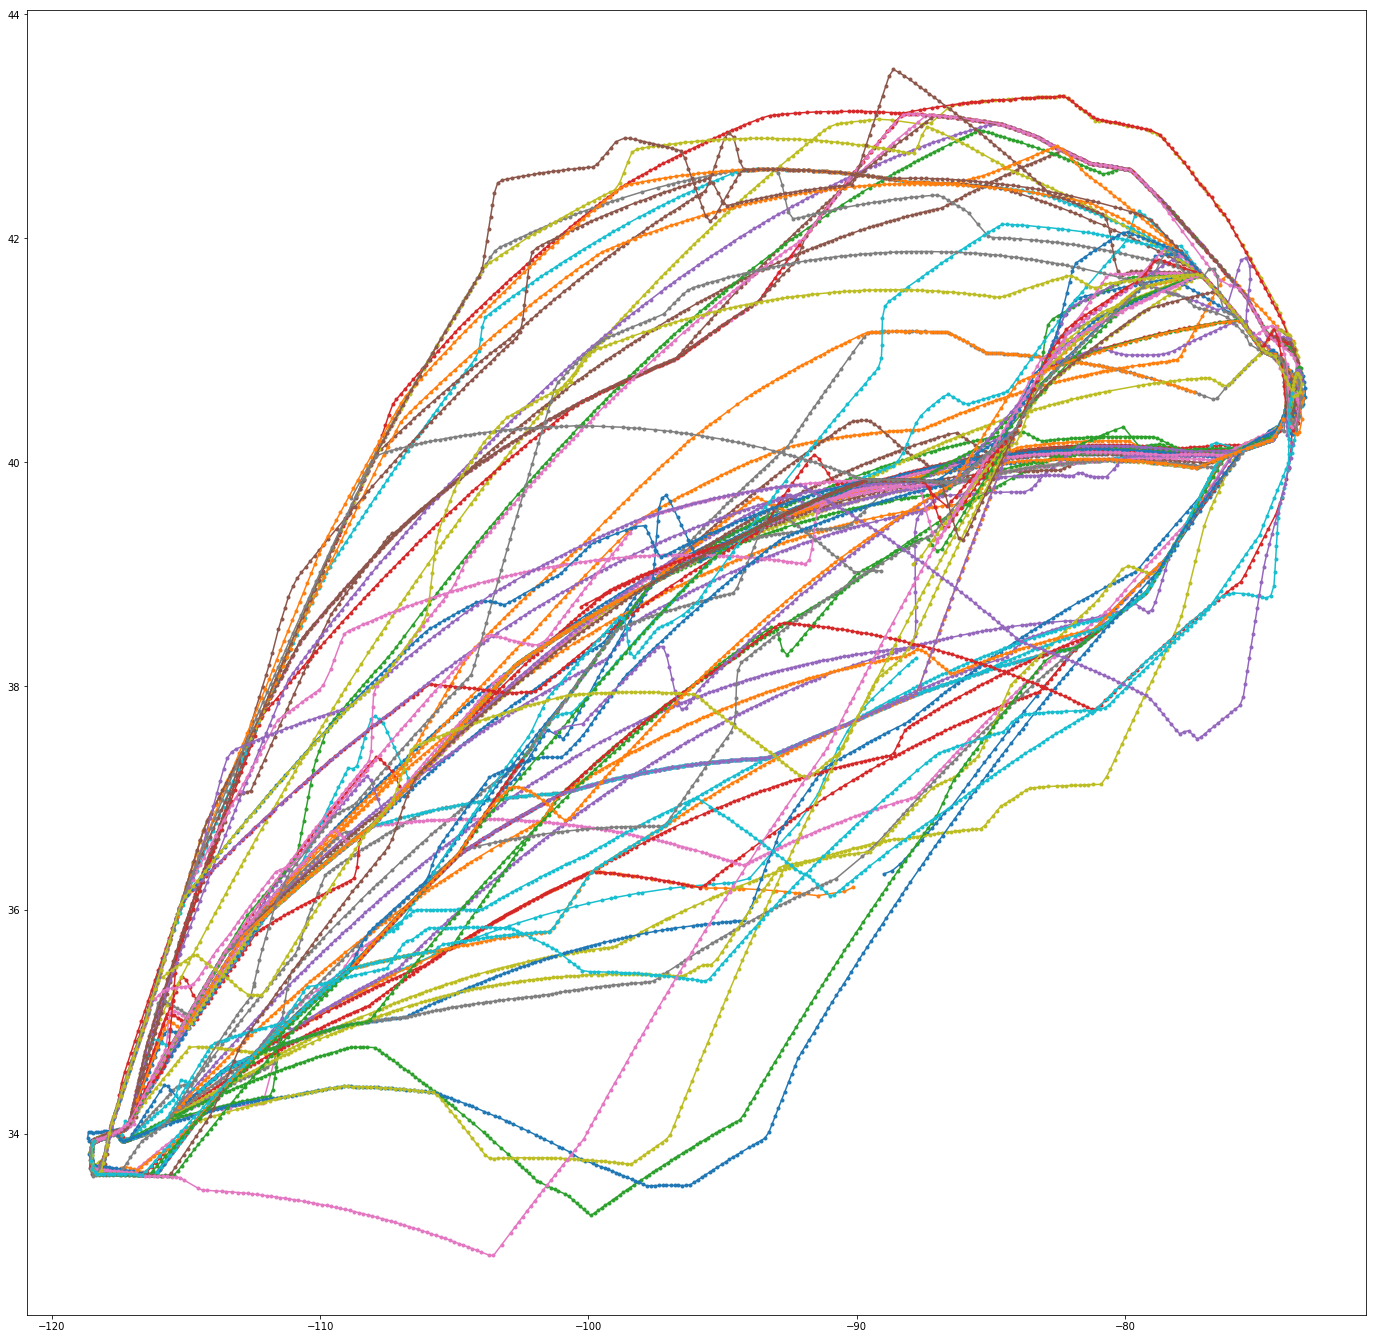

In [93]:
plt.figure(figsize=(24,24))
for obj in docs[:100]:
    plt.plot(*np.array(obj['coordinates']).T, 'o-', markersize=3)

# Add flights to database

In [8]:
from util import chissl_mongo as cm

chissl = cm.ChisslMongo()

In [133]:
chissl.create_collection('Flights', docs, drop=True)

# Small dataset
grab a month of flights leaving JFK

```json
{"trajectory_properties.origin.value":"KJFK",
 "timestamps.0": {"$gte": "2016-09",
                  "$lt": "2016-10"}}
```

# Create a Flights application


In [126]:
X = np.vstack([doc['coordinates'] for doc in docs])

[xmin, ymin] = X.min(axis=0).tolist()
[xmax, ymax] = X.max(axis=0).tolist()

domain = {'x': [xmin, xmax],
          'y': [ymin, ymax]}

cm.ChisslMongo()\
    .create_application('JFK-LAX',
                        'Flights',
                        'TrajectoryComponent',
                        'util.applications.trajectories.pipeline',
                        props={'domain': domain},
                        drop=True)

{'_id': 'JFK-LAX',
 'collection': 'Flights',
 'component': 'TrajectoryComponent',
 'pipeline': 'util.applications.trajectories.pipeline',
 'props': {'domain': {'x': [-158.0500030517578, -35.79999923706055],
   'y': [14.199999809265137, 59.08333206176758]}}}